<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

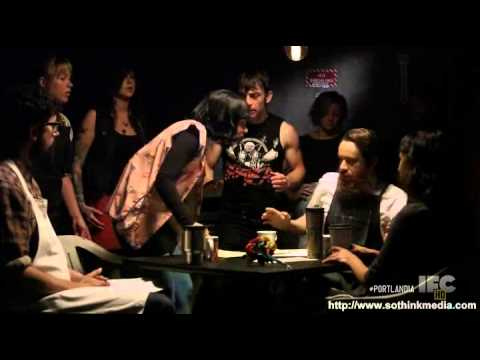

In [16]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [56]:
%pwd

'/Users/amin/Desktop/Lambda School/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [99]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

df = pd.read_csv(url)
df.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [100]:
# Start here 

# Checking the data types 

df.dtypes

coffee_shop_name    object
full_review_text    object
star_rating         object
dtype: object

In [103]:
df['full_review_text'][0][1:9]

'11/25/20'

In [104]:
#cleaning the data
df['dates'] = df['full_review_text'].apply(lambda x: x.split()[0])
df['star_rating'] = df['star_rating'].apply(lambda x: x.split()[0])
df

,coffee_shop_name,full_review_text,star_rating,dates
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0,11/25/2016
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0,12/2/2016
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0,11/30/2016
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0,11/25/2016
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0,12/3/2016
...,...,...,...,...
7611,The Steeping Room,2/19/2015 I actually step into this restauran...,4.0,2/19/2015
7612,The Steeping Room,"1/21/2016 Ok, The Steeping Room IS awesome. H...",5.0,1/21/2016
7613,The Steeping Room,"4/30/2015 Loved coming here for tea, and the ...",4.0,4/30/2015
7614,The Steeping Room,8/2/2015 The food is just average. The booths...,3.0,8/2/2015


In [105]:
# Converting star ratings to floats and dates to to_date formats
df['dates'] = pd.to_datetime(df['dates'])
df['star_rating'] = pd.to_numeric(df['star_rating'])
df.dtypes

coffee_shop_name            object
full_review_text            object
star_rating                float64
dates               datetime64[ns]
dtype: object

In [106]:
# Spliting the data between good and bad coffeeshops based on star ratings
df_good = df[(df['star_rating'] >= 4.0)]
df_bad = df[(df['star_rating'] < 4.0)]
df_good

,coffee_shop_name,full_review_text,star_rating,dates
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0,2016-11-25
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0,2016-12-02
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0,2016-11-30
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0,2016-12-03
5,The Factory - Cafe With a Soul,11/20/2016 1 check-in Very cute cafe! I think...,4.0,2016-11-20
...,...,...,...,...
7610,The Steeping Room,3/1/2016 Great food! I haven't had a meal I d...,5.0,2016-03-01
7611,The Steeping Room,2/19/2015 I actually step into this restauran...,4.0,2015-02-19
7612,The Steeping Room,"1/21/2016 Ok, The Steeping Room IS awesome. H...",5.0,2016-01-21
7613,The Steeping Room,"4/30/2015 Loved coming here for tea, and the ...",4.0,2015-04-30


In [107]:
df_bad

,coffee_shop_name,full_review_text,star_rating,dates
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0,2016-11-25
8,The Factory - Cafe With a Soul,"10/25/2016 1 check-in Ok, let's try this appr...",3.0,2016-10-25
11,The Factory - Cafe With a Soul,"11/20/2016 The store has A+ decoration, but h...",3.0,2016-11-20
12,The Factory - Cafe With a Soul,11/17/2016 1 check-in Listed in 2016 - The Th...,3.0,2016-11-17
25,The Factory - Cafe With a Soul,"12/2/2016 Okay, so after visiting my friends ...",1.0,2016-12-02
...,...,...,...,...
7582,The Steeping Room,8/21/2014 I should probably give this spot 4 ...,3.0,2014-08-21
7583,The Steeping Room,9/13/2015 It's a lovely little tea and pastry...,2.0,2015-09-13
7590,The Steeping Room,1/15/2015 So today I tried this place. I have...,3.0,2015-01-15
7600,The Steeping Room,5/10/2015 Great service with unimaginative an...,2.0,2015-05-10


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [108]:
# Overal word count:

#Start with creating a function to count words and list them in a table

from collections import Counter

def count(docs):
    word_counts = Counter()
    appears_in = Counter()
    
    total_docs = len(docs)
    
    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))
    
    temp = zip(word_counts.keys(), word_counts.values())
    wc = pd.DataFrame(temp, columns=['word', 'count'])
    
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    
    total = wc['count'].sum()
    
    wc['total_pct'] =  wc['count'].apply(lambda x: x / total)
    
    wc = wc.sort_values(by='rank')
    wc['cum_pct_total'] = wc['total_pct'].cumsum()
    
    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc , on='word')
    
    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
    
    return wc.sort_values(by='rank')

In [109]:
# Apply the function to reviews
word_count = count(df['full_review_text'])
word_count.head()

,word,appears_in,count,rank,total_pct,cum_pct_total,appears_in_pct
38,,7616,811098,1.0,0.186827,0.186827,1.000000
0,e,7616,412304,2.0,0.094969,0.281796,1.000000
7,t,7612,288595,3.0,0.066474,0.348270,0.999475
19,a,7613,267274,4.0,0.061563,0.409834,0.999606
2,o,7615,258721,5.0,0.059593,0.469427,0.999869


In [111]:
# Use spacy to tokenize and standardize the reviews
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

tokenizer = Tokenizer(nlp.vocab)

In [112]:
# Tokenizer pipe

tokens = []

"""Tokenize the reviews"""
for doc in tokenizer.pipe(df['full_review_text']):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

df['tokens'] = tokens

In [113]:
df['tokens']

0       [ , 11/25/2016, 1, check-in, Love, love, loved...
1       [ , 12/2/2016, Listed, in, Date, Night:, Austi...
2       [ , 11/30/2016, 1, check-in, Listed, in, Brunc...
3       [ , 11/25/2016, Very, cool, decor!, Good, drin...
4       [ , 12/3/2016, 1, check-in, They, are, located...
                              ...                        
7611    [ , 2/19/2015, I, actually, step, into, this, ...
7612    [ , 1/21/2016, Ok,, The, Steeping, Room, IS, a...
7613    [ , 4/30/2015, Loved, coming, here, for, tea,,...
7614    [ , 8/2/2015, The, food, is, just, average., T...
7615    [ , 5/23/2015, I, finally, stopped, in, for, l...
Name: tokens, Length: 7616, dtype: object

In [114]:
count(df['tokens'])

,word,appears_in,count,rank,total_pct,cum_pct_total,appears_in_pct
58,the,6520,27779,1.0,0.034334,0.034334,0.856092
31,and,6804,25748,2.0,0.031824,0.066157,0.893382
15,,7616,22606,3.0,0.027940,0.094097,1.000000
48,a,6181,22085,4.0,0.027296,0.121394,0.811581
46,I,5469,19780,5.0,0.024447,0.145841,0.718093
...,...,...,...,...,...,...,...
46121,restrictions.,1,1,46124.0,0.000001,0.999995,0.000131
46122,"specially,",1,1,46125.0,0.000001,0.999996,0.000131
46126,"digestion,",1,1,46126.0,0.000001,0.999998,0.000131
46123,Iced.,1,1,46127.0,0.000001,0.999999,0.000131


In [121]:
# Get rid of stop words
tokens = []

for doc in tokenizer.pipe(df['full_review_text']):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop==False) & (token.is_punct==False):
            doc_tokens.append(token.text.lower())
            
    tokens.append(doc_tokens)
    
df['tokens']=tokens

In [122]:
df['tokens']

0       [ , 11/25/2016, 1, check-in, love, love, loved...
1       [ , 12/2/2016, listed, date, night:, austin,, ...
2       [ , 11/30/2016, 1, check-in, listed, brunch, s...
3       [ , 11/25/2016, cool, decor!, good, drinks, ni...
4       [ , 12/3/2016, 1, check-in, located, northcros...
                              ...                        
7611    [ , 2/19/2015, actually, step, restaurant, cha...
7612    [ , 1/21/2016, ok,, steeping, room, awesome., ...
7613    [ , 4/30/2015, loved, coming, tea,, atmosphere...
7614    [ , 8/2/2015, food, average., booths, didn't, ...
7615    [ , 5/23/2015, finally, stopped, lunch, collea...
Name: tokens, Length: 7616, dtype: object

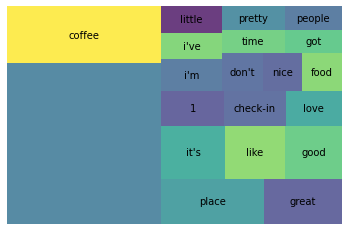

In [125]:
import squarify
import matplotlib.pyplot as plt

wc = count(df['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['total_pct'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [129]:
# Extending stop words
STOP_WORDS = nlp.Defaults.stop_words.union([" ", "i've", "i'm", "coffee", "1", "it's", "-", "austin"])

In [130]:
tokens = []

for doc in tokenizer.pipe(df['full_review_text']):
    
    doc_tokens = []
    
    for token in doc:
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
            
    tokens.append(doc_tokens)
    
df['tokens']=tokens

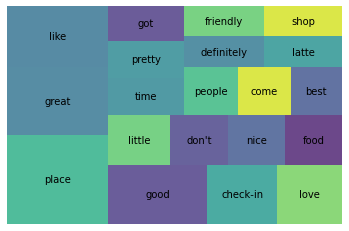

In [131]:
wc = count(df['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['total_pct'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [132]:
df['star_rating'].value_counts()

5.0    3780
4.0    2360
3.0     738
2.0     460
1.0     278
Name: star_rating, dtype: int64

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences

In [138]:
# Divide between good and bad coffee shops based on star_ratings
df_good = df[(df['star_rating'] >= 4.0)]
df_bad = df[(df['star_rating'] < 3.0)]
df_good

,coffee_shop_name,full_review_text,star_rating,dates,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0,2016-11-25,"[11/25/2016, check-in, love, love, loved, atmo..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0,2016-12-02,"[12/2/2016, listed, date, night:, austin,, amb..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0,2016-11-30,"[11/30/2016, check-in, listed, brunch, spots, ..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0,2016-12-03,"[12/3/2016, check-in, located, northcross, mal..."
5,The Factory - Cafe With a Soul,11/20/2016 1 check-in Very cute cafe! I think...,4.0,2016-11-20,"[11/20/2016, check-in, cute, cafe!, think, mom..."
...,...,...,...,...,...
7610,The Steeping Room,3/1/2016 Great food! I haven't had a meal I d...,5.0,2016-03-01,"[3/1/2016, great, food!, haven't, meal, enjoy,..."
7611,The Steeping Room,2/19/2015 I actually step into this restauran...,4.0,2015-02-19,"[2/19/2015, actually, step, restaurant, chance..."
7612,The Steeping Room,"1/21/2016 Ok, The Steeping Room IS awesome. H...",5.0,2016-01-21,"[1/21/2016, ok,, steeping, room, awesome., gre..."
7613,The Steeping Room,"4/30/2015 Loved coming here for tea, and the ...",4.0,2015-04-30,"[4/30/2015, loved, coming, tea,, atmosphere, p..."


In [139]:
df_bad

,coffee_shop_name,full_review_text,star_rating,dates,tokens
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0,2016-11-25,"[11/25/2016, cool, decor!, good, drinks, nice,..."
25,The Factory - Cafe With a Soul,"12/2/2016 Okay, so after visiting my friends ...",1.0,2016-12-02,"[12/2/2016, okay,, visiting, friends, la, tryi..."
39,The Factory - Cafe With a Soul,12/2/2016 A cafe that doesn't have Wifi but m...,1.0,2016-12-02,"[12/2/2016, cafe, doesn't, wifi, makes, order,..."
40,The Factory - Cafe With a Soul,"11/14/2016 Honestly, this place is having an ...",2.0,2016-11-14,"[11/14/2016, honestly,, place, having, identit..."
58,The Factory - Cafe With a Soul,11/20/2016 This is a tough one for me. I too...,2.0,2016-11-20,"[11/20/2016, tough, me., took, children, treat..."
...,...,...,...,...,...
7554,The Steeping Room,8/31/2015 Updated review I have to downgrade ...,1.0,2015-08-31,"[8/31/2015, updated, review, downgrade, review..."
7561,The Steeping Room,1/16/2016 Red haired woman who greeted us was...,1.0,2016-01-16,"[1/16/2016, red, haired, woman, greeted, unple..."
7574,The Steeping Room,5/8/2015 Can't vouch for the tea but the food...,2.0,2015-05-08,"[5/8/2015, can't, vouch, tea, food, meh., got,..."
7583,The Steeping Room,9/13/2015 It's a lovely little tea and pastry...,2.0,2015-09-13,"[9/13/2015, lovely, little, tea, pastry, shop,..."


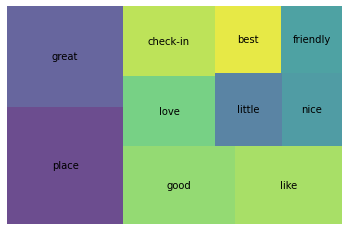

In [140]:
#Vizualizing good coffee shops reviews words (Top 10 words)
wc_good = count(df_good['tokens'])

wc_top10_good = wc_good[wc_good['rank'] <= 10]

squarify.plot(sizes=wc_top10_good['total_pct'], label=wc_top10_good['word'], alpha=.8 )
plt.axis('off')
plt.show()

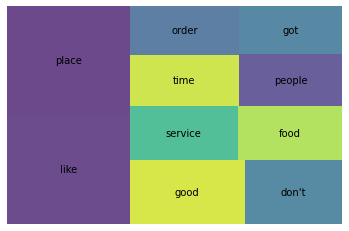

In [141]:
#Vizualizing bad coffee shops reviews words (Top 10 words)
wc_bad = count(df_bad['tokens'])

wc_top10_bad = wc_bad[wc_bad['rank'] <= 10]

squarify.plot(sizes=wc_top10_bad['total_pct'], label=wc_top10_bad['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

